# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import StratifiedKFold

data: pd.DataFrame = pd.read_csv('heart_failure_clinical_records_dataset_after_preparation_balanced.csv', sep=';')
data

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0.0,0.0,1.0,1.0,0.000000,1.0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0.0,0.0,0.0,1.0,0.000000,1.0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0.0,0.0,0.0,1.0,1.000000,1.0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1.0,0.0,0.0,1.0,0.000000,1.0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1.0,1.0,0.0,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.191214,0.071319,0.346044,0.361392,0.167754,0.798697,0.248656,0.0,0.0,0.0,1.0,0.000000,1.0
402,0.393064,0.187083,0.138811,0.327651,0.097575,0.672264,0.726395,0.0,0.0,0.0,1.0,0.000000,1.0
403,0.663123,0.051869,0.319216,0.199377,0.144085,0.526706,0.469910,0.0,0.0,0.0,0.0,0.000000,1.0
404,0.678566,0.035355,0.237029,0.287376,0.414122,0.540813,0.072566,1.0,0.0,1.0,1.0,0.535775,1.0


## 3.0. Training Models

---

### Training Models

---

#### StratifiedKFold function
After loading the data, in data dataframe, we need to separate the target variable which is the DEATH_EVENT from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves

In [2]:
target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

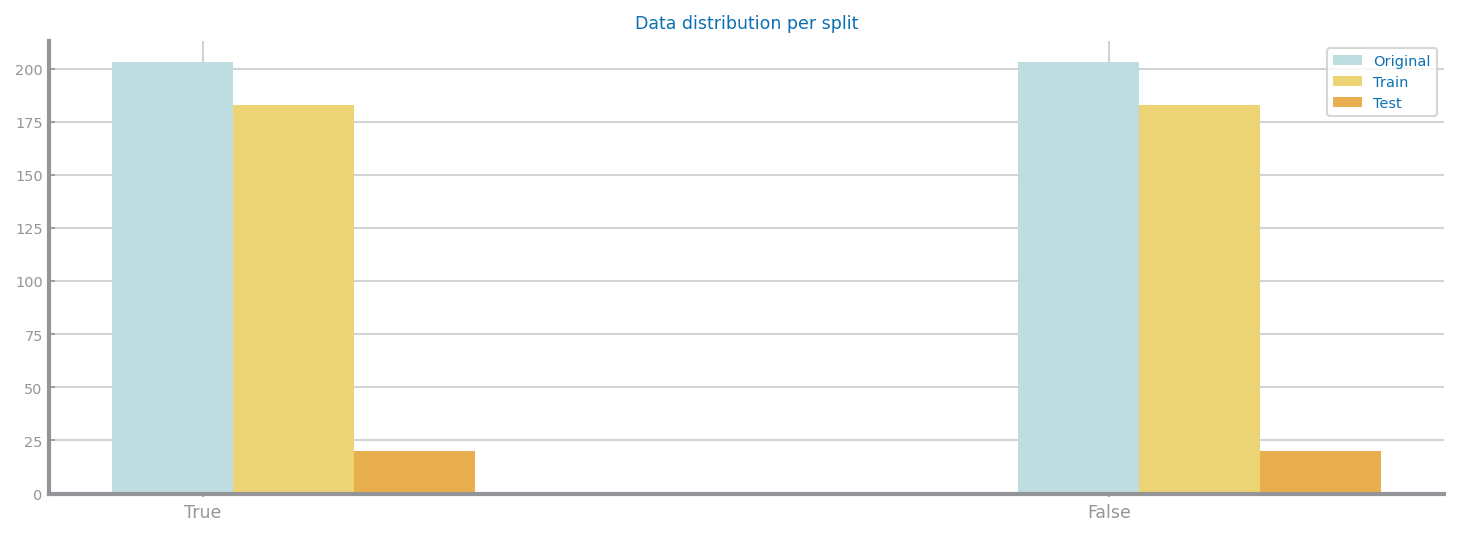

In [3]:
np.random.seed(1)
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

splits=[]

for train_index, test_index in skf.split(X, y):
    splits.append({'X_train': X[train_index], 'X_test': X[test_index],
                  'y_train': y[train_index], 'y_test': y[test_index]})

values['Train'] = [len(np.delete(y[train_index], np.argwhere(y[train_index]==negative))), len(np.delete(y[train_index], np.argwhere(y[train_index]==positive)))]
values['Test'] = [len(np.delete(y[test_index], np.argwhere(y[test_index]==negative))), len(np.delete(y[test_index], np.argwhere(y[test_index]==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per split', showXTickLabels=True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

## 3.2. KNN

---

### No balancing

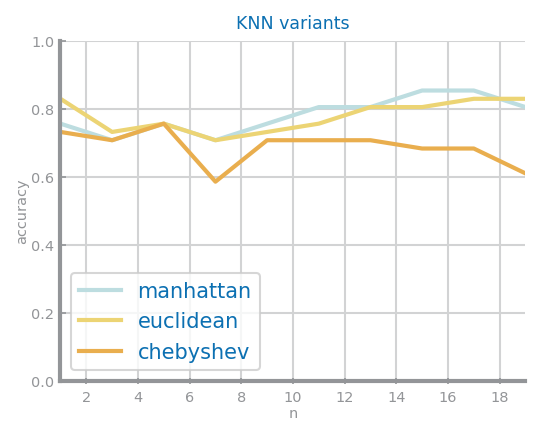

Best accuracy: 0.8536585365853658
Best results with 15 neighbors and manhattan


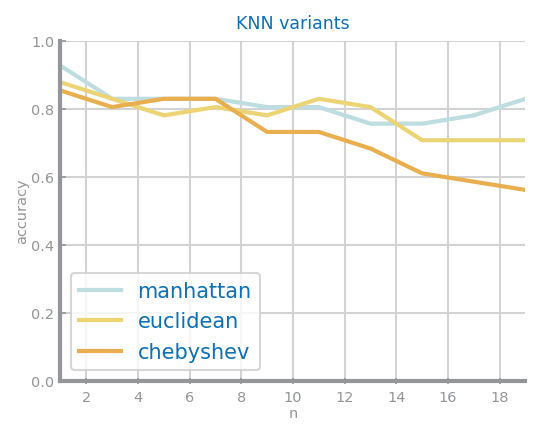

Best accuracy: 0.926829268292683
Best results with 1 neighbors and manhattan


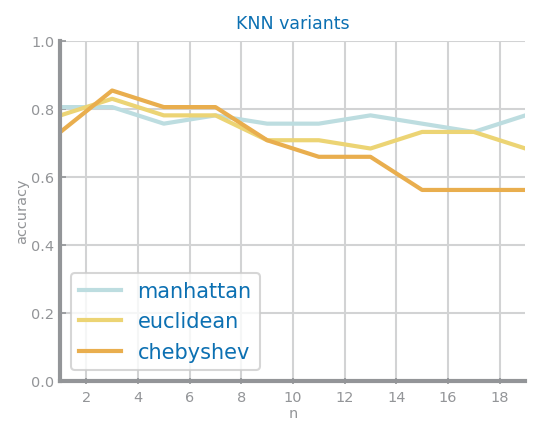

Best accuracy: 0.8536585365853658
Best results with 3 neighbors and chebyshev


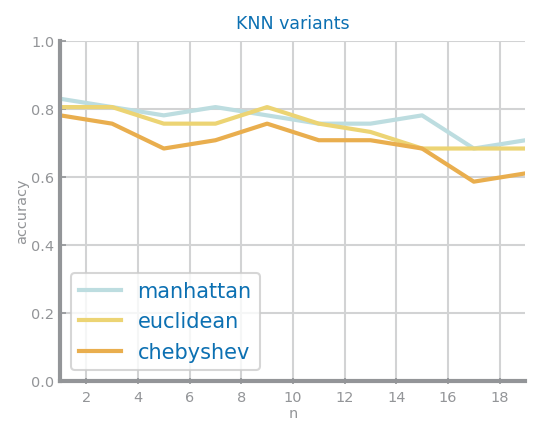

Best accuracy: 0.8292682926829268
Best results with 1 neighbors and manhattan


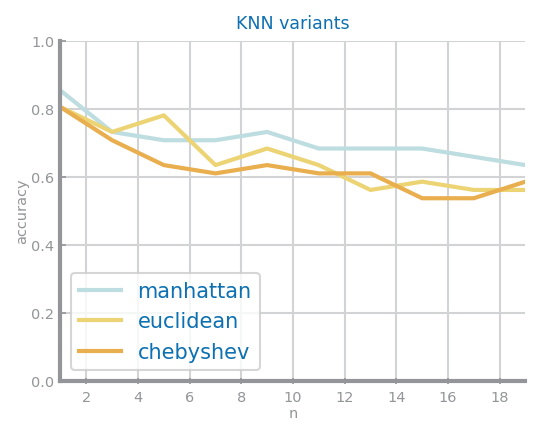

Best accuracy: 0.8536585365853658
Best results with 1 neighbors and manhattan


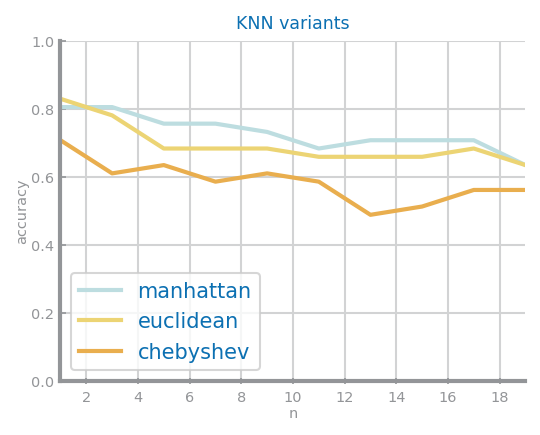

Best accuracy: 0.8292682926829268
Best results with 1 neighbors and euclidean


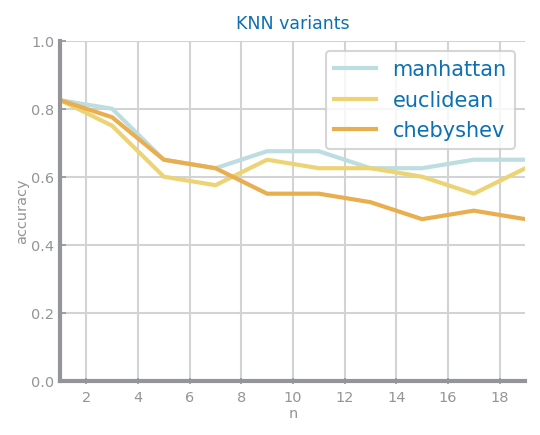

Best accuracy: 0.825
Best results with 1 neighbors and manhattan


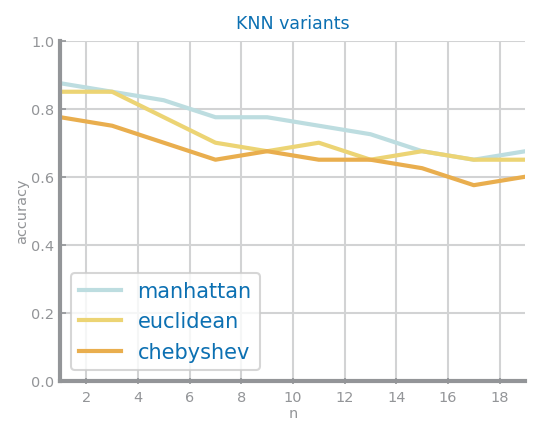

Best accuracy: 0.875
Best results with 1 neighbors and manhattan


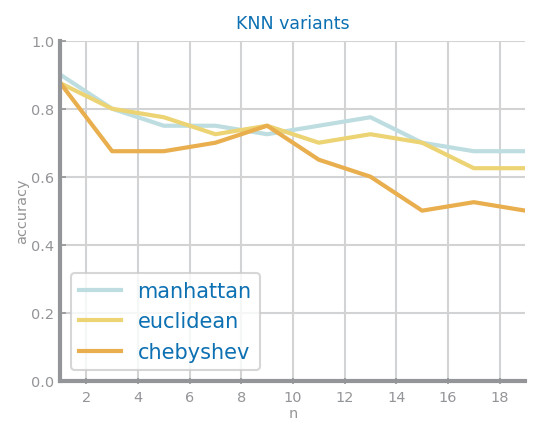

Best accuracy: 0.9
Best results with 1 neighbors and manhattan


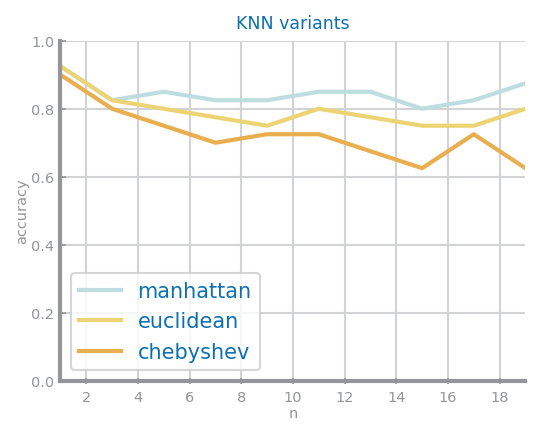

Best accuracy: 0.925
Best results with 1 neighbors and manhattan


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

split_best = []

for spli in range(len(splits)):
    split = splits[spli]
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(split['X_train'], split['y_train'])
            prdY = knn.predict(split['X_test'])
            yvalues.append(metrics.accuracy_score(split['y_test'], prdY))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues
    split_best.append(best)
    
    plt.figure()
    ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
    plt.show()
    print("Best accuracy:", last_best)
    print('Best results with %d neighbors and %s'%(best[0], best[1]))

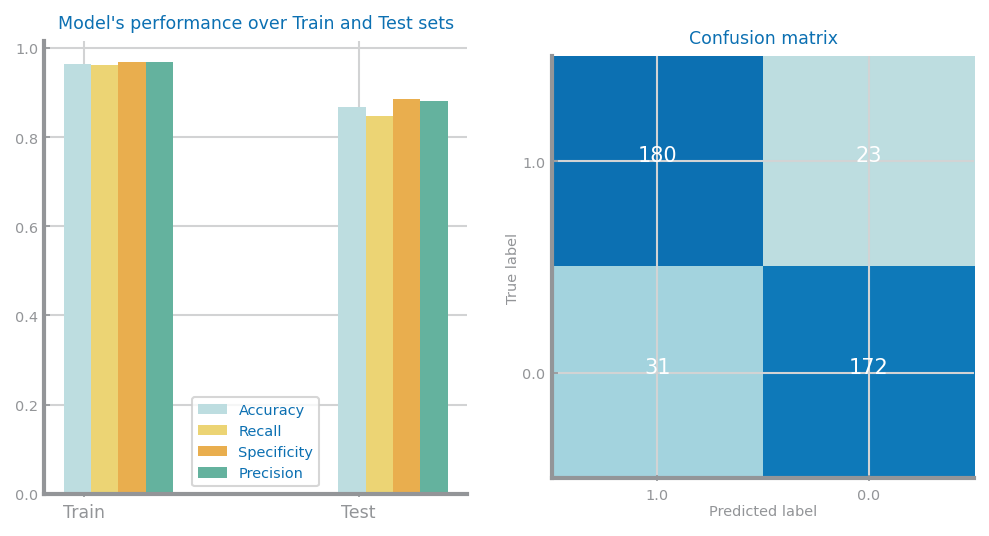

In [5]:
totalYTrn = np.array(())
totalPrd_trn = np.array(())
totalYTst = np.array(())
totalPrd_tst = np.array(())

for spli in range(len(splits)):
    split = splits[spli]
    best = split_best[spli]
    
    clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
    clf.fit(split['X_train'], split['y_train'])
    
    prd_trn = clf.predict(split['X_train'])
    totalYTrn = np.concatenate((totalYTrn, split['y_train']))
    totalPrd_trn = np.concatenate((totalPrd_trn, prd_trn))
    
    prd_tst = clf.predict(split['X_test'])
    totalYTst = np.concatenate((totalYTst, split['y_test']))
    totalPrd_tst = np.concatenate((totalPrd_tst, prd_tst))
    
ds.plot_evaluation_results(labels, totalYTrn, totalPrd_trn, totalYTst, totalPrd_tst, showXTickLabels=True)

### Summary

---

***How do models improve with the increase of neighbors?***


***How does performance changes with different distance measures?***


***What is the best parametrisation (number of neighbors and distance measure)?***


***Is the accuracy achieved good enough?***


***What is the largest kind of errors?***


***Is it possible to identify overfitting?***
